# Homework 2

This notebook is used to analyze the data created in `get_reddit_posts.py`.

## Imports

In [10]:
import pandas as pd

## Read the data


In [11]:
comments_df = pd.read_csv('data/comments_df_10.csv')

# print the first five rows
comments_df.head()

,Unnamed: 0,id,score,created_utc,body,parent_id,author,subreddit
0,0,gnshzvc,11970,1.613586e+09,The mods are going to have a field day trying ...,t3_llzdbq,Aztecman02,news
1,1,gns9iej,7732,1.613583e+09,*sorts by controversial*,t3_llzdbq,Grashopha,news
2,2,gns8ar2,13972,1.613582e+09,Lung cancer is a hell of a way to go.,t3_llzdbq,wshanahan,news
3,3,gns8jh8,9702,1.613582e+09,[deleted],t3_llzdbq,[deleted],news
4,4,gnshpzr,8459,1.613586e+09,“Liberty will never perish as long as men die....,t3_llzdbq,Emanon1999,news


# Clean the data
We will clean the data by removing posts that have no body.

In [12]:
comments_df.dropna(inplace=True)

## Convert dates
We will convert dates from Unix time to a more readable format.

In [13]:
# from: https://stackoverflow.com/questions/19231871/
comments_df['created_time'] = pd.to_datetime(comments_df['created_utc'], unit='s')

# Question 2
## Q2.2: Which subreddit has the most distinct comment authors?

We need to use the subreddit column and the author_id column.


In [24]:
# get dataframe with unique pairings of subreddit and author
sub_author_unique = comments_df.groupby(['subreddit', 'author'])['created_time'].count().reset_index()

# count the number of these pairings for each subreddit
sub_author_unique.groupby('subreddit')['author'].count().sort_values(ascending=False)

subreddit
Music             1151
memes              736
AskReddit          382
videos             365
todayilearned      337
Showerthoughts     334
news               141
Name: author, dtype: int64

## 3.3 Get Post by Day of Week
The line below will create a new column called `dow` that contains the day of the week for each post.

In [6]:
comments_df['dow'] = comments_df['created_time'].dt.day_name()

Now, we will plot the total number of comments for each day of the week.

<Axes: xlabel='dow'>

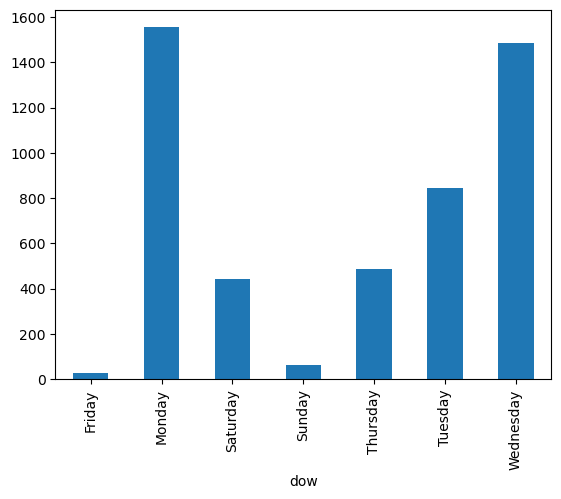

In [8]:
comments_df.groupby('dow')['created_time'].count().plot(kind='bar')

The days are not ordered correctly. We can fix this by using the `Categorical` type.

In [7]:
comments_df['dow'] = pd.Categorical(comments_df['dow'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

<Axes: xlabel='dow'>

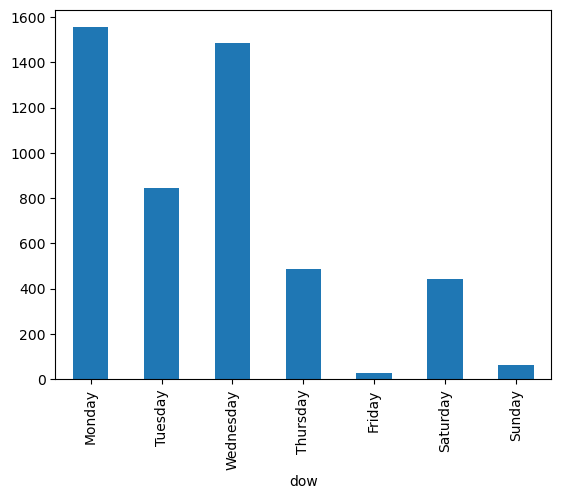

In [8]:
comments_df.groupby('dow')['created_time'].count().plot(kind='bar')

[Text(0.5, 0, 'Day Of The Week'),
 Text(0, 0.5, 'Total Number of Posts'),
 Text(0.5, 1.0, 'Reddit Posts Per Day of the Week')]

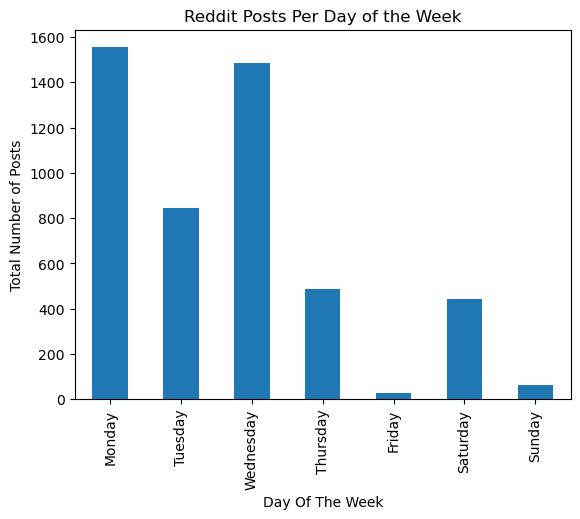

In [11]:
dow_plot = comments_df.groupby('dow')['created_time'].count().plot(kind='bar')

dow_plot.set(xlabel="Day Of The Week", ylabel="Total Number of Posts",
             title="Reddit Posts Per Day of the Week")

# dow_plot.get_figure() # this prints a duplicate plot

# Counting Words

In [16]:

from collections import Counter 
results = Counter() 
comments_df['body'].str.split().apply(results.update)
print(results.most_common(25))

[('the', 3580), ('to', 2454), ('a', 2411), ('I', 2162), ('and', 1913), ('of', 1660), ('is', 1327), ('in', 1171), ('you', 1157), ('that', 1126), ('it', 1009), ('for', 894), ('was', 763), ('on', 660), ('this', 640), ('but', 588), ('my', 569), ('be', 550), ('with', 534), ('like', 530), ('have', 509), ('are', 500), ('just', 469), ('not', 468), ('he', 429)]


If we convert the text to lower first, we get more accurate counts.

In [17]:
results = Counter() 
# convert string to lower, split on whitespace, then update the counts
comments_df['body'].str.lower().str.split().apply(results.update)
print(results.most_common(25))

[('the', 3925), ('to', 2498), ('a', 2487), ('i', 2267), ('and', 2063), ('of', 1672), ('you', 1370), ('is', 1367), ('that', 1225), ('in', 1218), ('it', 1189), ('for', 923), ('this', 817), ('was', 778), ('but', 714), ('on', 673), ('my', 673), ('he', 568), ('like', 563), ('be', 561), ('with', 544), ('not', 539), ('are', 539), ('just', 527), ('have', 525)]


# Find URLs
Use the function we built for finding URLs.

In [20]:
import text_processing # this is the script we created in class (text_processing.py)

comments_df['urls'] = comments_df['body'].apply(text_processing.find_urls)

find_urls received the text: That girl is more frat than every guy in that room.
find_urls found: []
find_urls received the text: I've watched this video about 10 times now and I still can't figure out how the can actually opened, and how she doesn't have a gaping wound on her forehead
find_urls found: []
find_urls received the text: Someday she is going to be living in suburbia with a few kids and an uncle or a cousin is going to show this to her 16 year old daughter after she says something about how lame her mom is.

The daughter will struggle with what is really real for a few days after she first sees it.
find_urls found: []
find_urls received the text: So Steve Austin has a daughter who goes to college in Maryland. 
find_urls found: []
find_urls received the text: AND catches one handed. 
find_urls found: []
find_urls received the text: The combination of her beastly act and that dudes reaction at the end makes this video a masterpiece. 
find_urls found: []
find_urls received the

In [22]:
comments_df['urls']

0                                                      []
1                                                      []
2                                                      []
3                                                      []
4                                                      []
                              ...                        
4897                                                   []
4898                                                   []
4899    [https://en.m.wikipedia.org/wiki/Anti-humor), ...
4900                                                   []
4901                                                   []
Name: urls, Length: 4902, dtype: object